In [3]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\UDDESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\UDDESH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
!pip install wordcloud



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Load the dataset (update the file path as needed)
df = pd.read_csv("dataset.csv")  # Example dataset

# Show first few rows
df.head()



,title,text,subject,date
0,Summer law direction order environment ground.,Enjoy billion feel. Part might perform box. Du...,panic,2025-03-29
1,Employee money large campaign line study autho...,Customer area stay organization majority shake...,disinformation,2025-08-13
2,Interview human marriage piece drop shoulder m...,Country sort indicate. Though large pull reali...,panic,2024-09-12
3,Congress alone table blue land true entire.,Prevent leave indicate a deal positive sell. I...,disinformation,2024-10-08
4,Notice majority public.,Recent old responsibility they. Real necessary...,panic,2025-08-14


In [6]:
# Check data types and missing values
df.info()

# Summary statistics
df.describe()

# Check distribution of labels (if applicable)
if 'label' in df.columns:
    print(df['label'].value_counts())
    sns.countplot(x='label', data=df)
    plt.title('Distribution of Labels')
    plt.show()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    5000 non-null   object
 1   text     5000 non-null   object
 2   subject  5000 non-null   object
 3   date     5000 non-null   object
dtypes: object(4)
memory usage: 156.4+ KB


In [7]:
# Check missing values
print(df.isnull().sum())


title      0
text       0
subject    0
date       0
dtype: int64


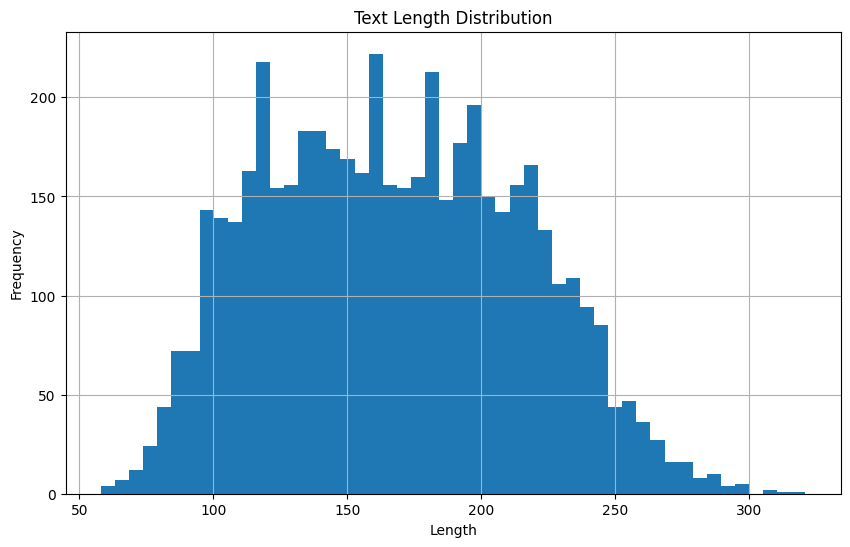

In [8]:
# Create text length column if text exists
if 'text' in df.columns:
    df['text_length'] = df['text'].apply(len)
    plt.figure(figsize=(10,6))
    df['text_length'].hist(bins=50)
    plt.title('Text Length Distribution')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.show()



In [10]:
# Drop rows with missing text
df = df.dropna(subset=['text'])

# Reset index
df = df.reset_index(drop=True)


In [11]:
# Install nltk if not already installed
!pip install nltk

# Import libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required datasets
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Example text cleaning function
import re

def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove punctuation and numbers
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

# Example dataframe
import pandas as pd

data = {
    'text': ["This is an example sentence!", "Cleaning text is fun and useful."]
}

df = pd.DataFrame(data)

# Apply text cleaning
df['clean_text'] = df['text'].apply(clean_text)

# Display cleaned text
df[['text', 'clean_text']]




[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\UDDESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\UDDESH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,clean_text
0,This is an example sentence!,example sentence
1,Cleaning text is fun and useful.,cleaning text fun useful


In [12]:
import pandas as pd

# Load your dataset (update the path if needed)
df = pd.read_csv('true.csv')  # Replace 'your_dataset.csv' with your actual file name

# Check the first few rows to confirm it's loaded
df.head()


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [13]:
# Create a new column 'text_length' that counts the number of characters in each news article
df['text_length'] = df['text'].apply(len)

# Check if the column is created
df[['text', 'text_length']].head()


,text,text_length
0,WASHINGTON (Reuters) - The head of a conservat...,4659
1,WASHINGTON (Reuters) - Transgender people will...,4077
2,WASHINGTON (Reuters) - The special counsel inv...,2789
3,WASHINGTON (Reuters) - Trump campaign adviser ...,2461
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,5204


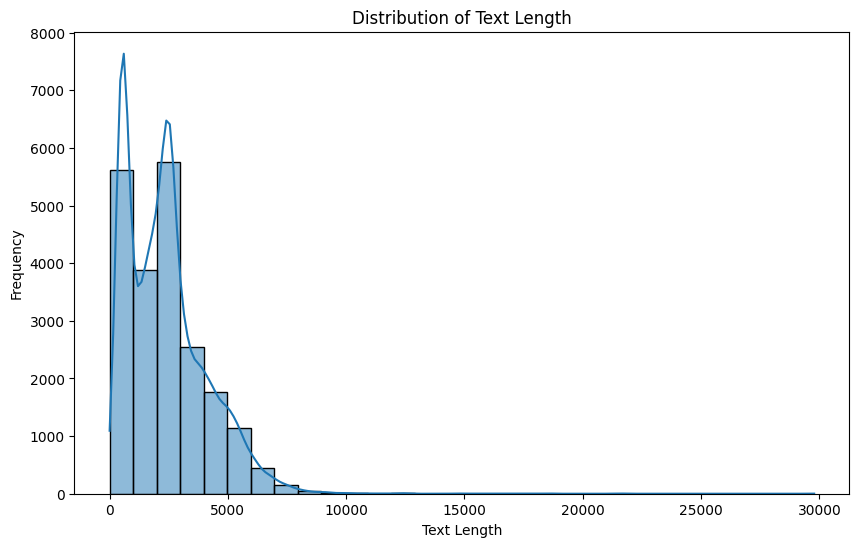

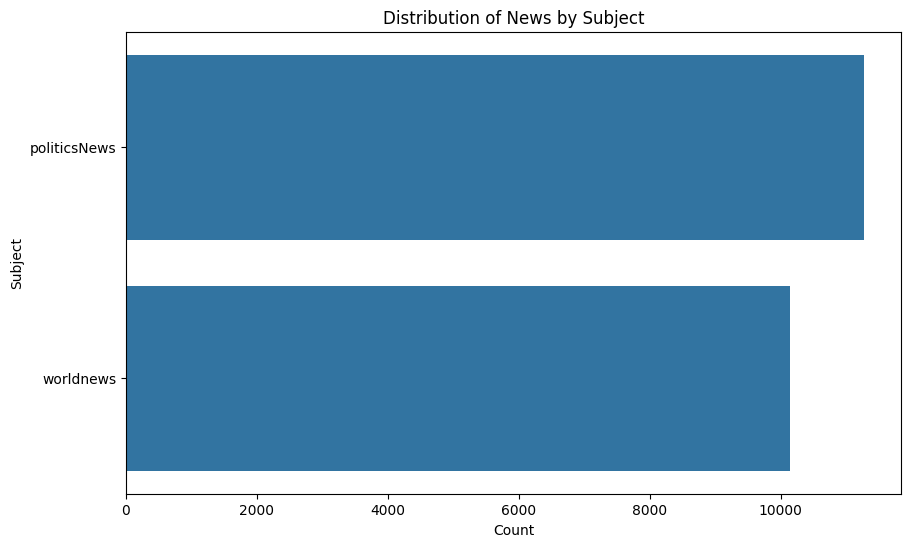

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis of 'text_length'
plt.figure(figsize=(10,6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# Univariate analysis of 'subject'
plt.figure(figsize=(10,6))
sns.countplot(y='subject', data=df, order=df['subject'].value_counts().index)
plt.title('Distribution of News by Subject')
plt.xlabel('Count')
plt.ylabel('Subject')
plt.show()


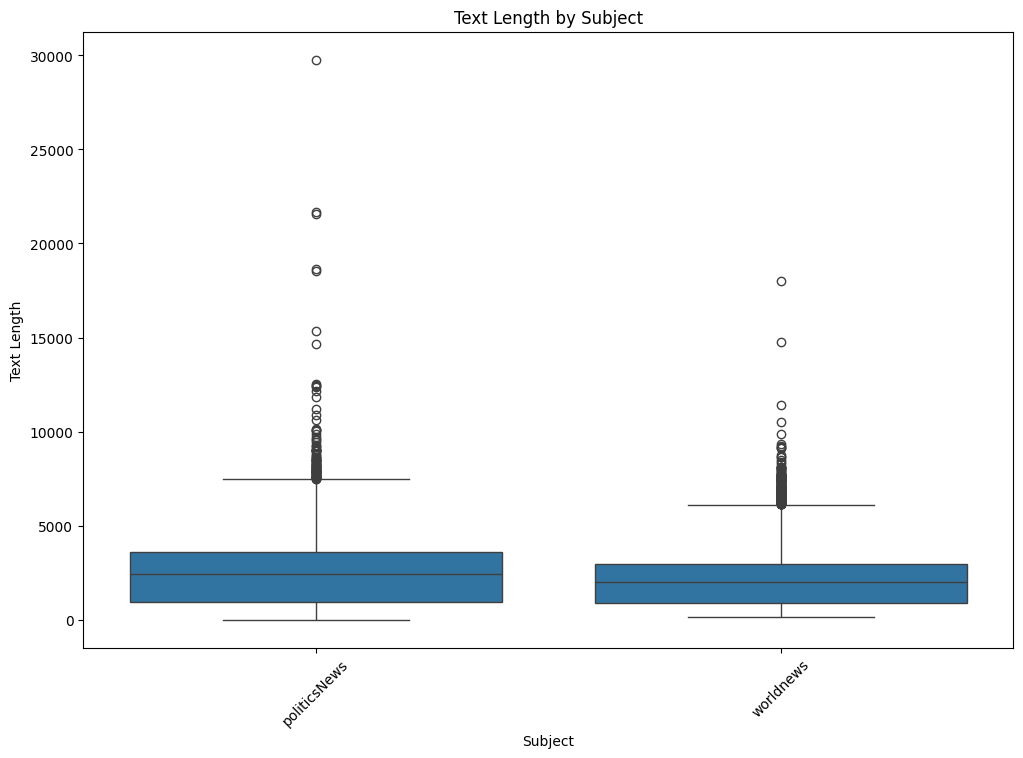

In [15]:
# Relationship between text length and subject
plt.figure(figsize=(12,8))
sns.boxplot(x='subject', y='text_length', data=df)
plt.xticks(rotation=45)
plt.title('Text Length by Subject')
plt.xlabel('Subject')
plt.ylabel('Text Length')
plt.show()


In [16]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define text cleaning function
def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove punctuation and numbers
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

# Apply text cleaning
df['clean_text'] = df['text'].apply(clean_text)

# Display cleaned text
df[['text', 'clean_text']].head()


,text,clean_text
0,WASHINGTON (Reuters) - The head of a conservat...,washington reuters head conservative republica...
1,WASHINGTON (Reuters) - Transgender people will...,washington reuters transgender people allowed ...
2,WASHINGTON (Reuters) - The special counsel inv...,washington reuters special counsel investigati...
3,WASHINGTON (Reuters) - Trump campaign adviser ...,washington reuters trump campaign adviser geor...
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,seattle washington reuters president donald tr...


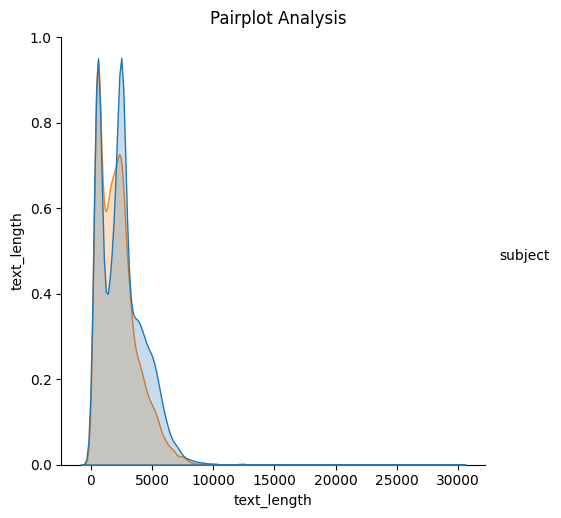

In [17]:
# Pairplot for text length and subject using hue
sns.pairplot(df, x_vars=['text_length'], y_vars=['text_length'], hue='subject', height=5)
plt.suptitle('Pairplot Analysis', y=1.02)
plt.show()


In [18]:
# Create 'text_length' column
df['text_length'] = df['text'].apply(len)


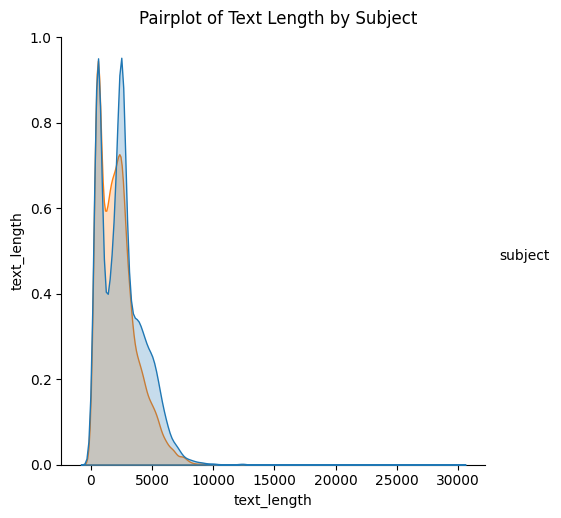

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns (ensure 'subject' exists in your dataset)
sns.pairplot(df, vars=['text_length'], hue='subject', height=5)

plt.suptitle('Pairplot of Text Length by Subject', y=1.02)
plt.show()


In [20]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()

# Or fill missing values if appropriate
# df['column_name'] = df['column_name'].fillna('Unknown')


title          0
text           0
subject        0
date           0
text_length    0
clean_text     0
dtype: int64


In [21]:
df['text_length'] = df['text'].apply(len)


In [22]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define text cleaning function
def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove numbers and punctuation
    text = text.lower()  # Convert to lowercase
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

# Apply text cleaning
df['clean_text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\UDDESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\UDDESH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X = vectorizer.fit_transform(df['clean_text']).toarray()


In [24]:
df.head()


,title,text,subject,date,text_length,clean_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",4659,washington reuters head conservative republica...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",4077,washington reuters transgender people allowed ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",2789,washington reuters special counsel investigati...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",2461,washington reuters trump campaign adviser geor...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",5204,seattle washington reuters president donald tr...


In [25]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['subject']  # Use the correct column name

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 17133
Testing set size: 4284


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [27]:
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [28]:
# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [29]:
# Predict on test data
y_pred = model.predict(X_test_tfidf)


In [30]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9323062558356676
Classification Report:
               precision    recall  f1-score   support

politicsNews       0.94      0.93      0.94      2256
   worldnews       0.92      0.94      0.93      2028

    accuracy                           0.93      4284
   macro avg       0.93      0.93      0.93      4284
weighted avg       0.93      0.93      0.93      4284

Confusion Matrix:
 [[2091  165]
 [ 125 1903]]


In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC AUC Score (for binary classification)
if len(set(y)) == 2:  # Check if binary classification
    print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test_tfidf)[:,1]))


Accuracy: 0.9323062558356676
Classification Report:
               precision    recall  f1-score   support

politicsNews       0.94      0.93      0.94      2256
   worldnews       0.92      0.94      0.93      2028

    accuracy                           0.93      4284
   macro avg       0.93      0.93      0.93      4284
weighted avg       0.93      0.93      0.93      4284

Confusion Matrix:
 [[2091  165]
 [ 125 1903]]
ROC AUC Score: 0.9807681379131871


In [32]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],   # Regularization strength
    'penalty': ['l2'],        # Type of regularization
    'solver': ['lbfgs']       # Algorithm
}

# Initialize Grid Search
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')

# Fit the grid search
grid.fit(X_train_tfidf, y_train)

# Best parameters and best score
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

# Evaluate on test data
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test_tfidf)

print("Test Accuracy with best parameters:", accuracy_score(y_test, y_pred_best))


Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.9391232121688777
Test Accuracy with best parameters: 0.9327731092436975


In [33]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())


Cross-validation scores: [0.93551211 0.93959732 0.93813831 0.94629305 0.93053123]
Mean CV accuracy: 0.9380144046854323


In [34]:
vectorizer = TfidfVectorizer(max_features=500)  # Reduce number of features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [35]:
# Create additional numeric features
df['text_length'] = df['text'].apply(len)                  # Number of characters
df['word_count'] = df['text'].apply(lambda x: len(x.split()))  # Number of words
df['char_count'] = df['text'].apply(lambda x: sum(len(word) for word in x.split()))  # Total characters in words


In [36]:
# Select numeric columns
numeric_features = ['text_length', 'word_count', 'char_count']

# Compute correlation matrix
corr_matrix = df[numeric_features].corr()

print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
             text_length  word_count  char_count
text_length     1.000000    0.998037    0.999755
word_count      0.998037    1.000000    0.997329
char_count      0.999755    0.997329    1.000000


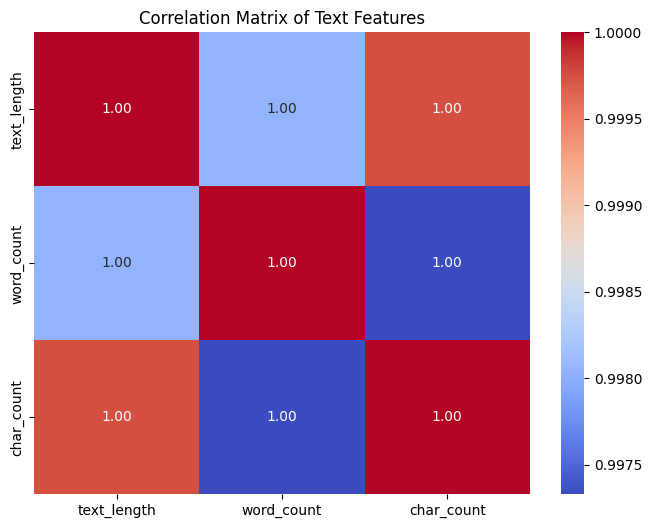

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Text Features')
plt.show()


In [38]:
# Initialize the logistic regression model with optimized parameters (if any)
final_model = LogisticRegression(max_iter=1000, class_weight='balanced')  

# Train on the entire training data
final_model.fit(X_train_tfidf, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [39]:
# Predict on the test set
y_final_pred = final_model.predict(X_test_tfidf)


In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print("Final Model Accuracy:", accuracy_score(y_test, y_final_pred))

# Detailed classification report
print("Final Model Classification Report:\n", classification_report(y_test, y_final_pred))

# Confusion matrix
print("Final Model Confusion Matrix:\n", confusion_matrix(y_test, y_final_pred))


Final Model Accuracy: 0.9262371615312792
Final Model Classification Report:
               precision    recall  f1-score   support

politicsNews       0.94      0.92      0.93      2256
   worldnews       0.91      0.94      0.92      2028

    accuracy                           0.93      4284
   macro avg       0.93      0.93      0.93      4284
weighted avg       0.93      0.93      0.93      4284

Final Model Confusion Matrix:
 [[2071  185]
 [ 131 1897]]


In [41]:
# Example: Convert categories to 0 and 1
df['label_binary'] = df['subject'].map({
    'politicsNews': 0,
    'worldnews': 1
})

# Then redefine X and y
X = df['text']
y = df['label_binary']

# Continue with splitting, vectorizing, training...



ROC AUC Score: 0.976533102172423


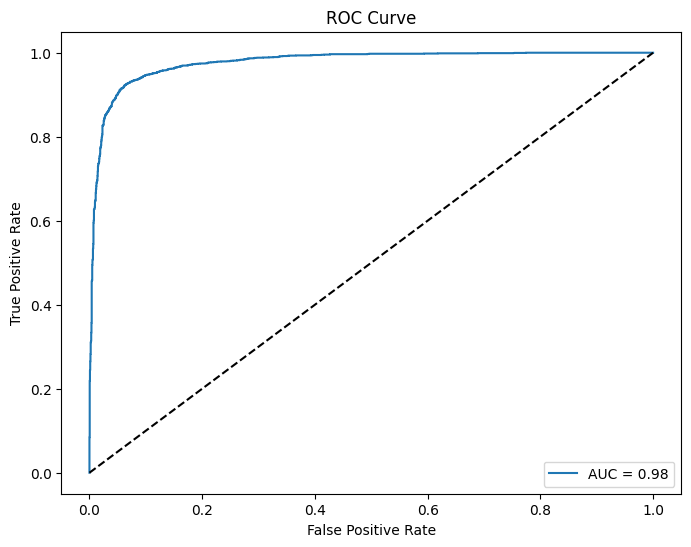

In [42]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities
y_prob = final_model.predict_proba(X_test_tfidf)[:, 1]

# Specify which label is considered positive
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='worldnews')

# Calculate AUC score
auc_score = roc_auc_score(y_test.map({'politicsNews': 0, 'worldnews': 1}), y_prob)

print("ROC AUC Score:", auc_score)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [43]:
if 'label' in df.columns:
    selector = SelectKBest(chi2, k=2000)
    X_new = selector.fit_transform(X, y)
    print("Original shape:", X.shape)
    print("Reduced shape:", X_new.shape)


In [44]:
if 'label' in df.columns:
    model = RandomForestClassifier()
    model.fit(X, y)
    importances = model.feature_importances_
    indices = np.argsort(importances)[-10:]
    top_features = [vectorizer.get_feature_names_out()[i] for i in indices]
    print("Top 10 important features:")
    print(top_features)


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Apply TF-IDF on clean text column
X = vectorizer.fit_transform(df['clean_text']).toarray()

print("Shape of feature matrix:", X.shape)


Shape of feature matrix: (21417, 5000)


In [46]:
print("Shape of X:", X.shape)
if 'X_new' in locals():
    print("Shape of X_new:", X_new.shape)


Shape of X: (21417, 5000)


In [47]:
n_samples, n_features = X.shape  # or X_new.shape if using feature selection
n_components = min(10, n_samples, n_features)  # choose a small number

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_new if 'X_new' in locals() else X)

print("Shape after PCA:", X_pca.shape)


Shape after PCA: (21417, 10)


In [48]:
from sklearn.decomposition import PCA

# Check shape first
data = X_new if 'X_new' in locals() else X
n_samples, n_features = data.shape
print(f"Samples: {n_samples}, Features: {n_features}")

# Choose a valid number of components
n_components = min(10, n_samples, n_features)
print(f"Using {n_components} components for PCA")

# Apply PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(data)

print("Shape after PCA:", X_pca.shape)


Samples: 21417, Features: 5000
Using 10 components for PCA
Shape after PCA: (21417, 10)


In [49]:
n_samples, n_features = X.shape  # or X_new.shape if using feature selection
n_components = min(10, n_samples, n_features)  # choose a small number

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_new if 'X_new' in locals() else X)

print("Shape after PCA:", X_pca.shape)


Shape after PCA: (21417, 10)


In [50]:
from sklearn.decomposition import PCA

# Check shape first
data = X_new if 'X_new' in locals() else X
n_samples, n_features = data.shape
print(f"Samples: {n_samples}, Features: {n_features}")

# Choose a valid number of components
n_components = min(10, n_samples, n_features)
print(f"Using {n_components} components for PCA")

# Apply PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(data)

print("Shape after PCA:", X_pca.shape)


Samples: 21417, Features: 5000
Using 10 components for PCA
Shape after PCA: (21417, 10)


In [51]:
# Check the shape of your data before PCA
if 'X_new' in locals():
    data = X_new
    print("Using feature-selected data (X_new)")
else:
    data = X
    print("Using original data (X)")

print("Shape of data:", data.shape)


Using original data (X)
Shape of data: (21417, 5000)


In [52]:
from sklearn.decomposition import PCA

n_samples, n_features = data.shape
n_components = min(10, n_samples, n_features)  # dynamically adjust

print(f"Samples: {n_samples}, Features: {n_features}")
print(f"Setting n_components to: {n_components}")

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(data)

print("Shape after PCA:", X_pca.shape)


Samples: 21417, Features: 5000
Setting n_components to: 10
Shape after PCA: (21417, 10)


title
Factbox: Trump fills top jobs for his administration                                  14
Factbox: Contenders for senior jobs in Trump's administration                          8
Highlights: The Trump presidency on April 13 at 9:30 P.M. EDT/0130 GMT on Friday       8
Factbox: International reaction to arrest of Reuters reporters in Myanmar              6
Highlights: The Trump presidency on April 21 at 6:12 p.m. EDT/2212 GMT                 5
                                                                                      ..
Exclusive: U.S. memo weakens guidelines for protecting immigrant children in court     1
Trump travel ban should not apply to people with strong U.S. ties: court               1
Second court rejects Trump bid to stop transgender military recruits                   1
Democrat wins U.S. Senate seat in Alabama in setback for Trump                         1
FBI Russia probe helped by Australian diplomat tip-off: NYT                            1
Name: count, Le

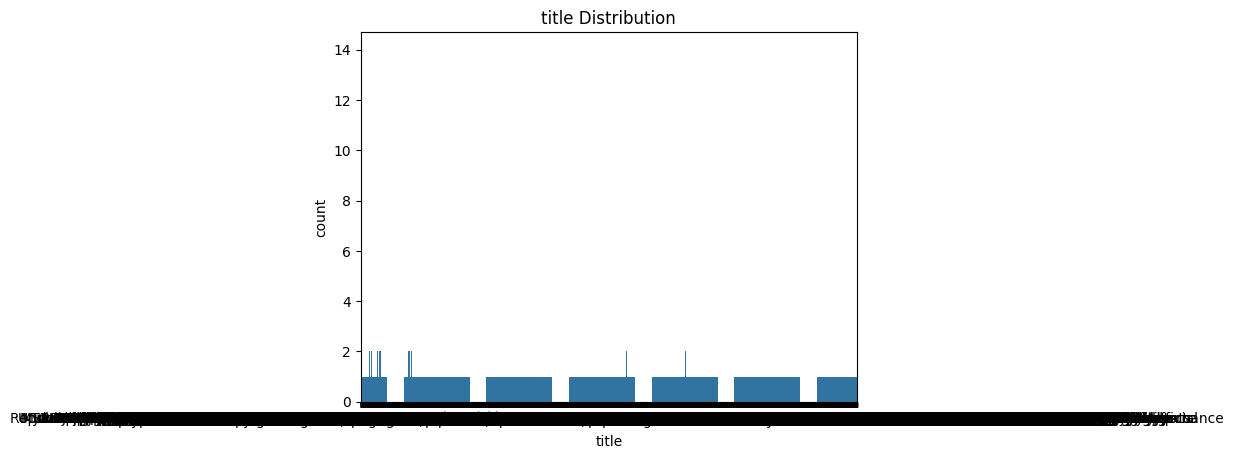

In [53]:
# Check how many examples belong to each class (e.g., fake vs real)
if 'title' in df.columns:
    print(df['title'].value_counts())
    sns.countplot(x='title', data=df)
    plt.title('title Distribution')
    plt.show()
else:
    print("title column not found!")


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'label' in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(x='label', data=df)
    plt.title('Distribution of Labels')
    plt.xlabel('Label (0 = Real, 1 = Fake)')
    plt.ylabel('Number of Samples')
    plt.show()
else:
    print("Label column not found!")


Label column not found!


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of labels if 'label' column exists
if 'label' in df.columns:
    plt.figure(figsize=(8,6))
    sns.countplot(x='label', data=df)
    plt.title('Label Distribution')
    plt.xlabel('Label (0 = Real, 1 = Fake)')
    plt.ylabel('Number of Samples')
    plt.show()
else:
    print("Label column not found!")


Label column not found!


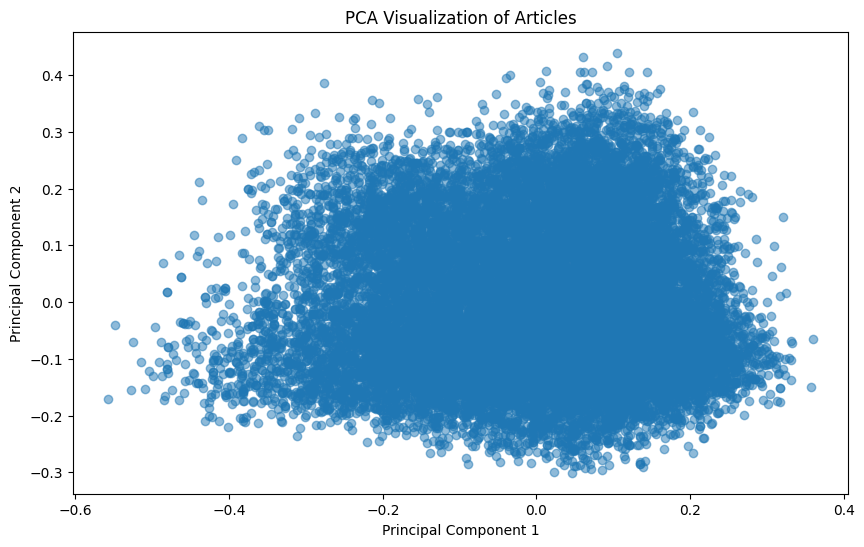

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['text']).toarray()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('PCA Visualization of Articles')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


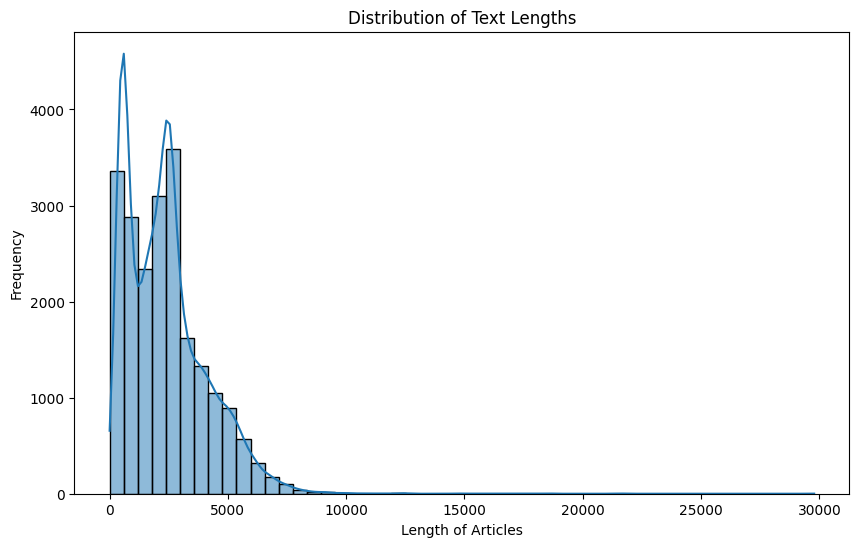

In [57]:
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(10,6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Length of Articles')
plt.ylabel('Frequency')
plt.show()


In [60]:
df.isnull().sum()


title           0
text            0
subject         0
date            0
text_length     0
clean_text      0
word_count      0
char_count      0
label_binary    0
year_month      0
dtype: int64

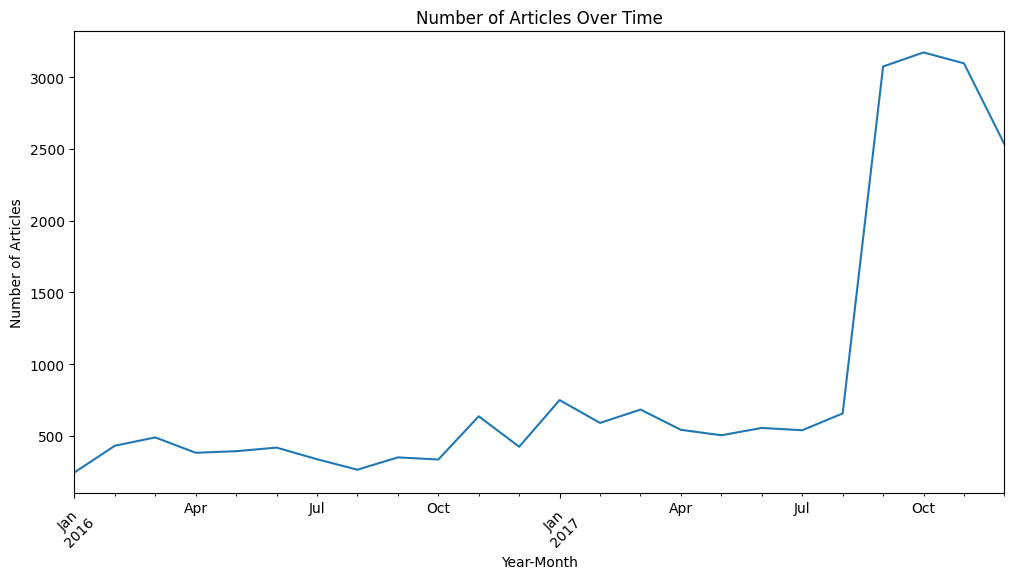

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create year-month column
df['year_month'] = df['date'].dt.to_period('M')

# Count articles per month
article_counts = df['year_month'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12,6))
article_counts.plot(kind='line')
plt.title('Number of Articles Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()


Accuracy: 0.8375350140056023
Classification Report:
               precision    recall  f1-score   support

politicsNews       0.81      0.90      0.85      2256
   worldnews       0.87      0.77      0.82      2028

    accuracy                           0.84      4284
   macro avg       0.84      0.83      0.84      4284
weighted avg       0.84      0.84      0.84      4284



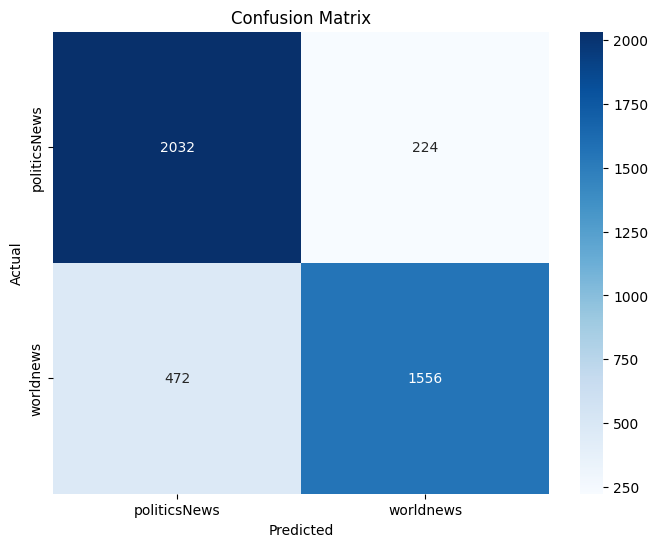

ROC AUC Score: 0.9276826555877292


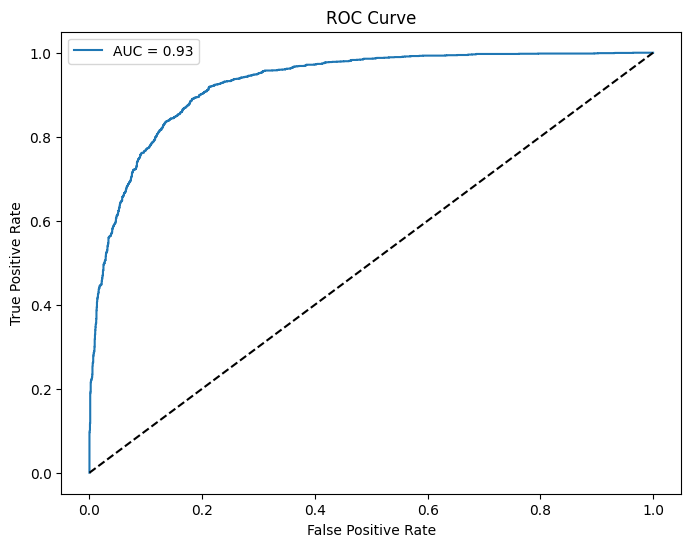

In [61]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Transform test data using the already fitted vectorizer
X_test_tfidf = vectorizer.transform(X_test)

# Predict using the final model
y_pred = model.predict(X_test_tfidf)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# If it's a binary classification, you can also check ROC AUC Score
try:
    y_prob = model.predict_proba(X_test_tfidf)[:, 1]  # probability for the positive class
    auc_score = roc_auc_score(y_test, y_prob)
    print("ROC AUC Score:", auc_score)

    fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=model.classes_[1])
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
except:
    print("ROC AUC cannot be computed for multi-class problems or if probability estimates are not available.")


In [63]:
# Save the trained model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save the vectorizer to a file
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!
